In [9]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02_unflipped'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [10]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01_unflipped/tmp/dataset_dict_pruned_lsn_tms.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [11]:
import json
with open(dict_path, 'r') as f:
    diction = json.load(f)
for k in diction.keys():
    print(k)

adni_Alzheimer
corbetta_memory
manitoba_memory
ms_memory
hebscher_tms
hermiller_tms_a1
hermiller_tms_b
wang_tms


In [32]:
tails = 'one_tail'
n_permutations = 100
method = 'spearman'
fwe = False
datasets_to_flip = [] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [33]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 100/100 [03:13<00:00,  1.94s/it]

Calculating one-tailed p-values
The one_tail p-value is: 0.0. This is the proportion of permuted averages that are greater than the observed average.
Overall p-value: 0.0


# 02 - Visualize Results

Similarity matrix

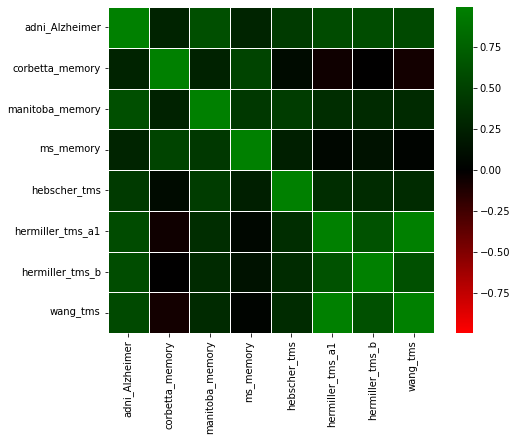

In [34]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

Permuted Similarity

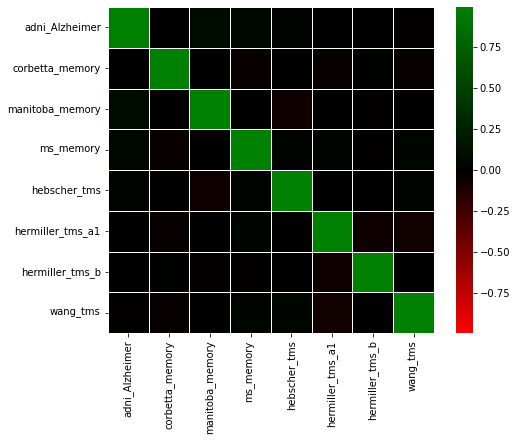

0.9952714001050159

In [35]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/permuted_similarity_matrix.svg', limit=limit)

Pairwise P values Matrix

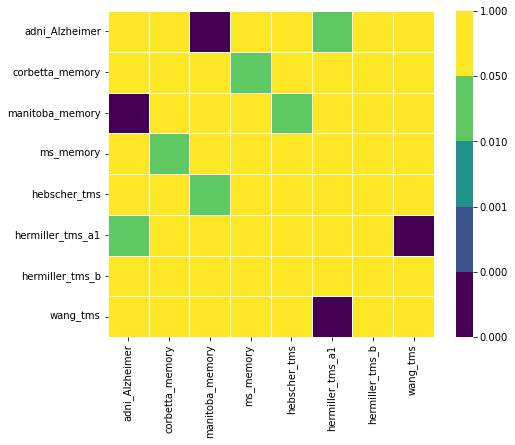

In [36]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

That's all
- calvin